# Insurance Claims- Fraud Detection

## Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 
 

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings("ignore")
print("Import complete")

Import complete


### Loading Dataset

In [2]:
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
338,120,30,563878,16-07-2002,IN,250/500,500,956.69,0,438237,FEMALE,Associate,priv-house-serv,movies,husband,39600,-64300,06-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Other,NY,Hillsdale,6770 1st St,20,1,?,1,1,YES,87100,8710,8710,69680,Saab,92x,2000,N,NaN
987,235,39,836349,01-05-2013,IL,500/1000,2000,1453.61,4000000,619570,MALE,JD,craft-repair,yachting,other-relative,0,0,13-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Other,NC,Hillsdale,5663 Oak Lane,10,1,?,0,3,?,60320,9280,9280,41760,Chevrolet,Tahoe,2012,Y,NaN
169,47,37,962591,16-03-2008,IN,250/500,2000,1241.97,0,430104,MALE,High School,other-service,movies,not-in-family,75400,0,05-01-2015,Parked Car,?,Minor Damage,None,NY,Hillsdale,8749 Tree St,18,1,NO,1,0,NO,6700,670,670,5360,Jeep,Wrangler,2011,N,NaN
613,75,27,831053,05-08-1992,IN,250/500,1000,1202.75,0,602289,MALE,High School,handlers-cleaners,board-games,not-in-family,57900,-90100,21-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,SC,Northbrook,9911 Britain Lane,23,3,NO,0,2,YES,79560,6630,13260,59670,Volkswagen,Passat,2003,N,NaN
612,56,42,655356,07-07-1996,IL,250/500,500,1339.39,0,471786,FEMALE,Associate,adm-clerical,chess,not-in-family,0,0,25-02-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NY,Columbus,3929 Elm Ave,13,1,?,1,2,YES,61490,11180,11180,39130,BMW,X5,1998,N,NaN
330,129,28,818413,23-02-1990,OH,500/1000,1000,1377.94,0,442540,MALE,Masters,machine-op-inspct,base-jumping,not-in-family,0,0,21-02-2015,Single Vehicle Collision,Side Collision,Major Damage,Fire,NY,Springfield,4272 Oak Ridge,23,1,?,2,3,?,44640,9920,4960,29760,Toyota,Camry,2005,N,NaN
773,174,33,179538,07-04-2014,IN,250/500,2000,1124.43,0,477346,FEMALE,College,farming-fishing,paintball,own-child,0,0,16-01-2015,Multi-vehicle Collision,Rear Collision,Total Loss,Ambulance,WV,Northbrook,1916 Elm St,14,3,YES,0,1,YES,44200,8840,4420,30940,Saab,93,1995,N,NaN
638,34,34,409074,19-03-1992,OH,500/1000,500,1295.87,0,438529,FEMALE,PhD,priv-house-serv,chess,husband,0,0,13-01-2015,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Columbus,3998 4th Hwy,4,3,?,1,0,NO,50800,5080,5080,40640,Audi,A3,1997,Y,NaN
374,419,53,457244,28-01-1998,IL,500/1000,2000,736.07,6000000,445339,MALE,College,transport-moving,chess,unmarried,45700,0,04-02-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,SC,Northbend,6738 Francis Hwy,17,4,?,0,0,YES,62280,5190,10380,46710,Suburu,Forrestor,2012,N,NaN
656,107,32,298412,06-05-2002,OH,100/300,500,1172.82,4000000,440680,MALE,Associate,machine-op-inspct,yachting,other-relative,82100,0,24-02-2015,Vehicle Theft,?,Trivial Damage,Police,SC,Arlington,9562 4th Ridge,8,1,?,1,3,NO,3900,780,390,2730,Ford,F150,2010,N,NaN


### Exploratory Data Analysis

In [3]:
# checking shape of dataset
df.shape

(1000, 40)

Here policy_bind_date and incident_date are date type variable but has been classified as object type so will be converting them to date time variable

In [4]:
# checking info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

From the info of the dataset, we can see that there are a total of 40 features, fraud_reported being the target feature and 17 variables are integer type variables, 2 float type variables, and 21 are object type variables. 

In [5]:
# converting to date time
df.policy_bind_date = pd.to_datetime(df.policy_bind_date)
df.incident_date = pd.to_datetime(df.incident_date)

In [6]:
# checking datatypes of the variables
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [7]:
# checking column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
# will be dropping incident_location feature as it does not gives any relevant information for prediction
df.drop(['incident_location'],axis=1,inplace=True)

In [9]:
#checking missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

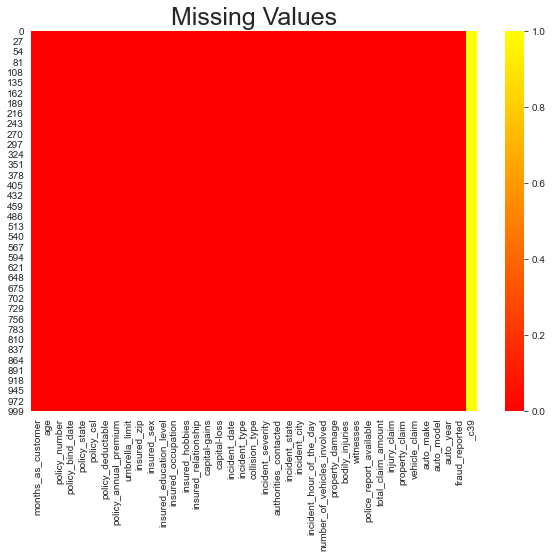

In [10]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(df.isnull(),cmap='autumn')
plt.show()

There are no missing values except the variable '_c39' which is entirely empty

In [11]:
# Since the variable '_c39' is totally a null column so will be dropping it 
df.drop(['_c39'],axis=1,inplace=True)

In [12]:
#dropping policy number as it is not important for prediction
df.drop(['policy_number'],axis=1,inplace=True)

In [13]:
print("Number of unique values in features: ")
df.nunique()

Number of unique values in features: 


months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_availa

- Analysing Target Variable 

In [14]:
print(f"Target: 'fraud_reported'\nUnique Values in fraud_reported: {df.fraud_reported.unique()}\nNumber of unique values: {df.fraud_reported.nunique()}")

Target: 'fraud_reported'
Unique Values in fraud_reported: ['Y' 'N']
Number of unique values: 2


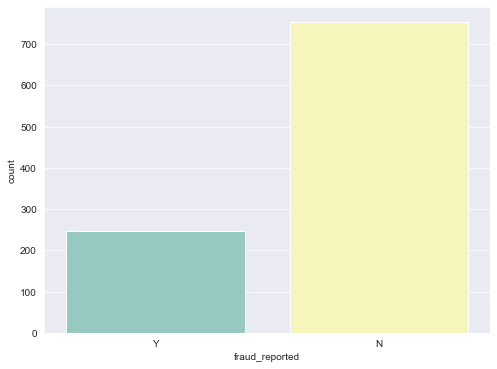

N    753
Y    247
Name: fraud_reported, dtype: int64


In [15]:
# visualising the distribution of target column
plt.figure(figsize=(8,6))
sns.countplot(x=df.fraud_reported,palette='Set3')
plt.show()
print(df.fraud_reported.value_counts())

In [16]:
#mapping the values with 0 and 1
df.fraud_reported = df.fraud_reported.map({'N':0,'Y':1})

In [17]:
# analysing date time variables

datetime_features= [feature for feature in df.columns if df[feature].dtypes == 'datetime64[ns]' ]
print('Number of date time variables: ', len(datetime_features))
print(datetime_features)

Number of date time variables:  2
['policy_bind_date', 'incident_date']


In [18]:
# visualising datetime features
df[datetime_features].head()

,policy_bind_date,incident_date
0,2014-10-17,2015-01-25
1,2006-06-27,2015-01-21
2,2000-06-09,2015-02-22
3,1990-05-25,2015-10-01
4,2014-06-06,2015-02-17


In [19]:
# will be extracting day month and year from the these variables

df['policy_bind_day'] = pd.DatetimeIndex(df.policy_bind_date).day
df['policy_bind_month'] = pd.DatetimeIndex(df.policy_bind_date).month
df['policy_bind_year'] = pd.DatetimeIndex(df.policy_bind_date).year

df['incident_day'] = pd.DatetimeIndex(df.incident_date).day
df['incident_month'] = pd.DatetimeIndex(df.incident_date).month
df['incident_year'] = pd.DatetimeIndex(df.incident_date).year

In [20]:
df.drop(['policy_bind_date', 'incident_date'],axis=1,inplace=True)

Total number of unique in policy_bind_day : 31


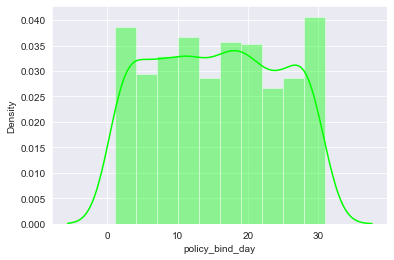

Total number of unique in policy_bind_month : 12


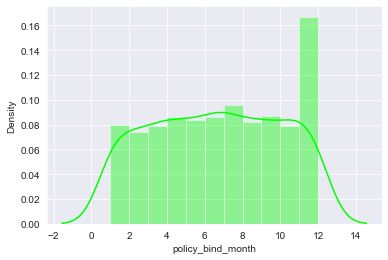

Total number of unique in policy_bind_year : 26


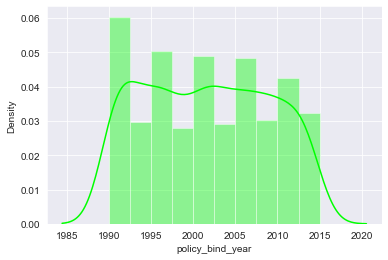

Total number of unique in incident_day : 22


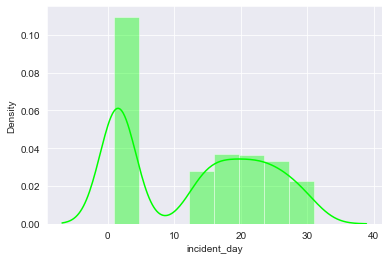

Total number of unique in incident_month : 12


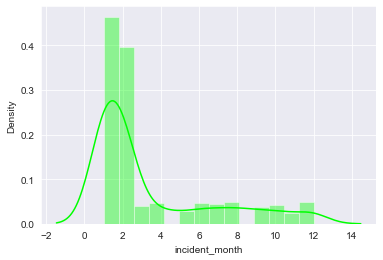

Total number of unique in incident_year : 1


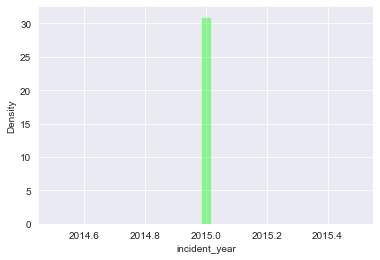

In [21]:
# unique values in date columns
cols = ['policy_bind_day','policy_bind_month','policy_bind_year',
        'incident_day','incident_month','incident_year']

for i in cols:
    print(f"Total number of unique in {i} : {df[i].nunique()}")
    sns.distplot(df[i],color='lime')
    plt.show()

- Since the variables are dicrete they have multiple peaks which tells they are not normally distributed
- Incident year has only one unique values
- Will further scale down the features in feature engineering to get to get a symmetric distribution till some extent  

In [22]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,6,6,2014,17,2,2015


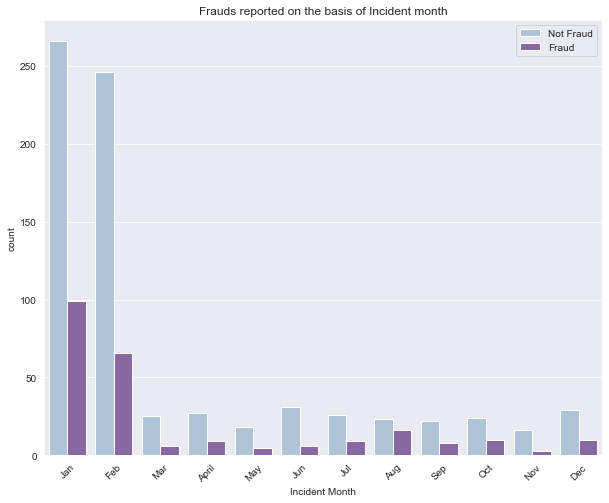

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.incident_month,hue=df.fraud_reported,palette='BuPu')
plt.title('Frauds reported on the basis of Incident month')
plt.xlabel('Incident Month')
plt.legend(labels=['Not Fraud','Fraud'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.show()

- Majorly frauds on the basis of incident month occur most in the month of January and February as compared to other months

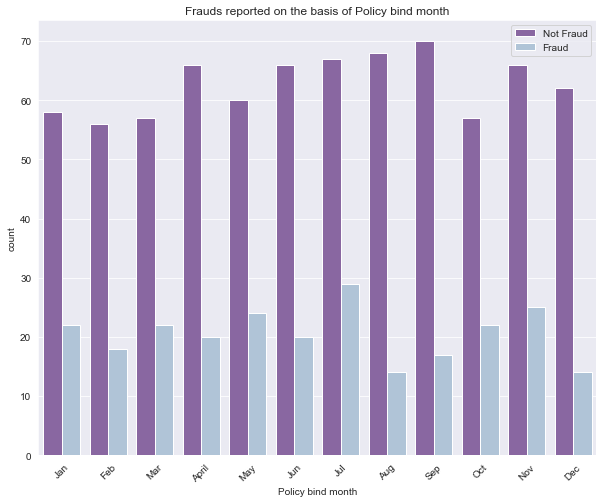

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.policy_bind_month,hue=df.fraud_reported,palette='BuPu_r')
plt.title('Frauds reported on the basis of Policy bind month')
plt.xlabel('Policy bind month')
plt.legend(labels=['Not Fraud','Fraud'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.show()

- There is no specific relation of fraud with policy bind month, which means frauds who get policy can get the policy in any month there is no specific month when mostly frauds get policy.

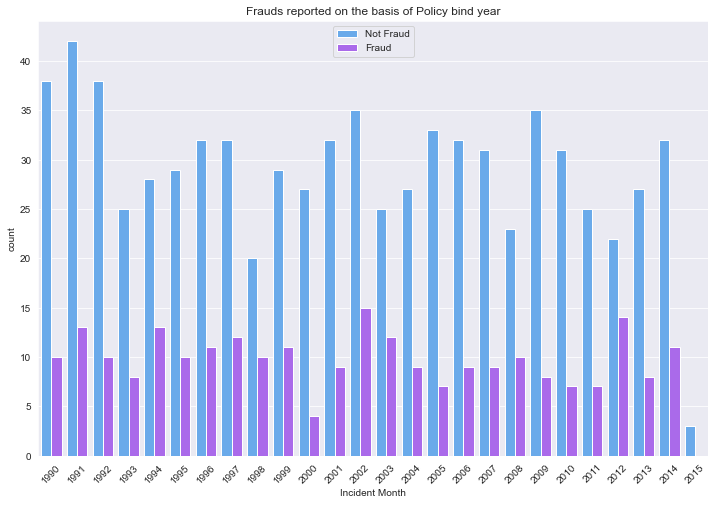

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x=df.policy_bind_year,hue=df.fraud_reported,palette='cool')
plt.title('Frauds reported on the basis of Policy bind year')
plt.xlabel('Incident Month')
plt.legend(labels=['Not Fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()

- There is no specific relation between frauds and incident year 

In [26]:
# analysing numerical variables other than date variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes not in 
                      ('O','datetime64[ns]')][:-6]

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  18
['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


In [27]:
# visualising numerical features
df[numerical_features].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0


In [28]:
for i in numerical_features:
    print(f"Total number of unique in {i} : {df[i].nunique()}")

Total number of unique in months_as_customer : 391
Total number of unique in age : 46
Total number of unique in policy_deductable : 3
Total number of unique in policy_annual_premium : 991
Total number of unique in umbrella_limit : 11
Total number of unique in insured_zip : 995
Total number of unique in capital-gains : 338
Total number of unique in capital-loss : 354
Total number of unique in incident_hour_of_the_day : 24
Total number of unique in number_of_vehicles_involved : 4
Total number of unique in bodily_injuries : 3
Total number of unique in witnesses : 4
Total number of unique in total_claim_amount : 763
Total number of unique in injury_claim : 638
Total number of unique in property_claim : 626
Total number of unique in vehicle_claim : 726
Total number of unique in auto_year : 21
Total number of unique in fraud_reported : 2


In [29]:
# checking statistical summary of numerical variables
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


- From the above table we can see the statistical summary of the variables
- The standard deviation for some features are duite high which implies the data is widely spread with some abnormality in the distribution, they might not be symetrically distributed.
- Also some of variables are somewhat normally distributed with less skewness since the mean and median do not have much differnce

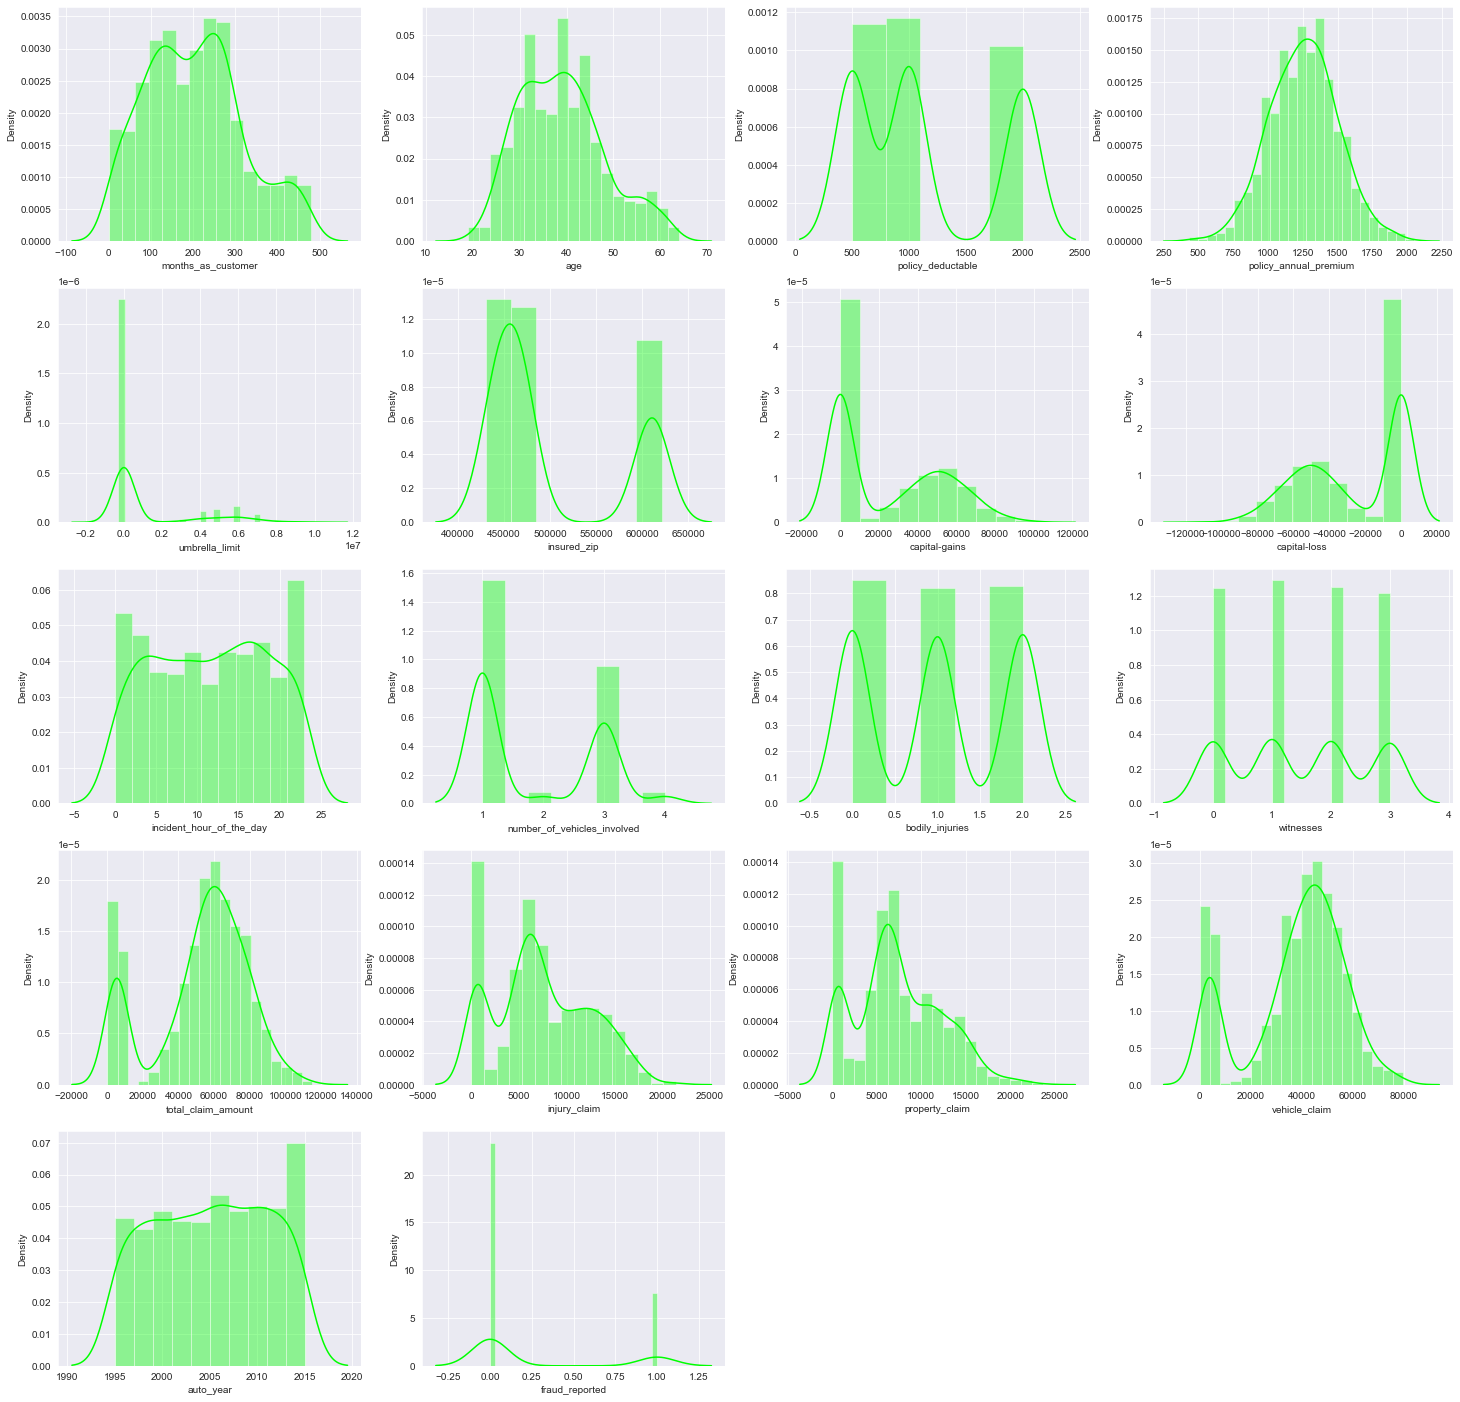

In [30]:
# analysing distribution of the numerical Features
plt.figure(figsize=(25,25))
plot = 1
for var in numerical_features:
    plt.subplot(5,4,plot)
    sns.distplot(df[var],color='lime')
    plot+=1
plt.show()

- From above plot we can see that age is normally distibuted
- Some features are having multiple peaks those imply that they are discrete in nature
- Some of the features are not normally distributed they are skewed

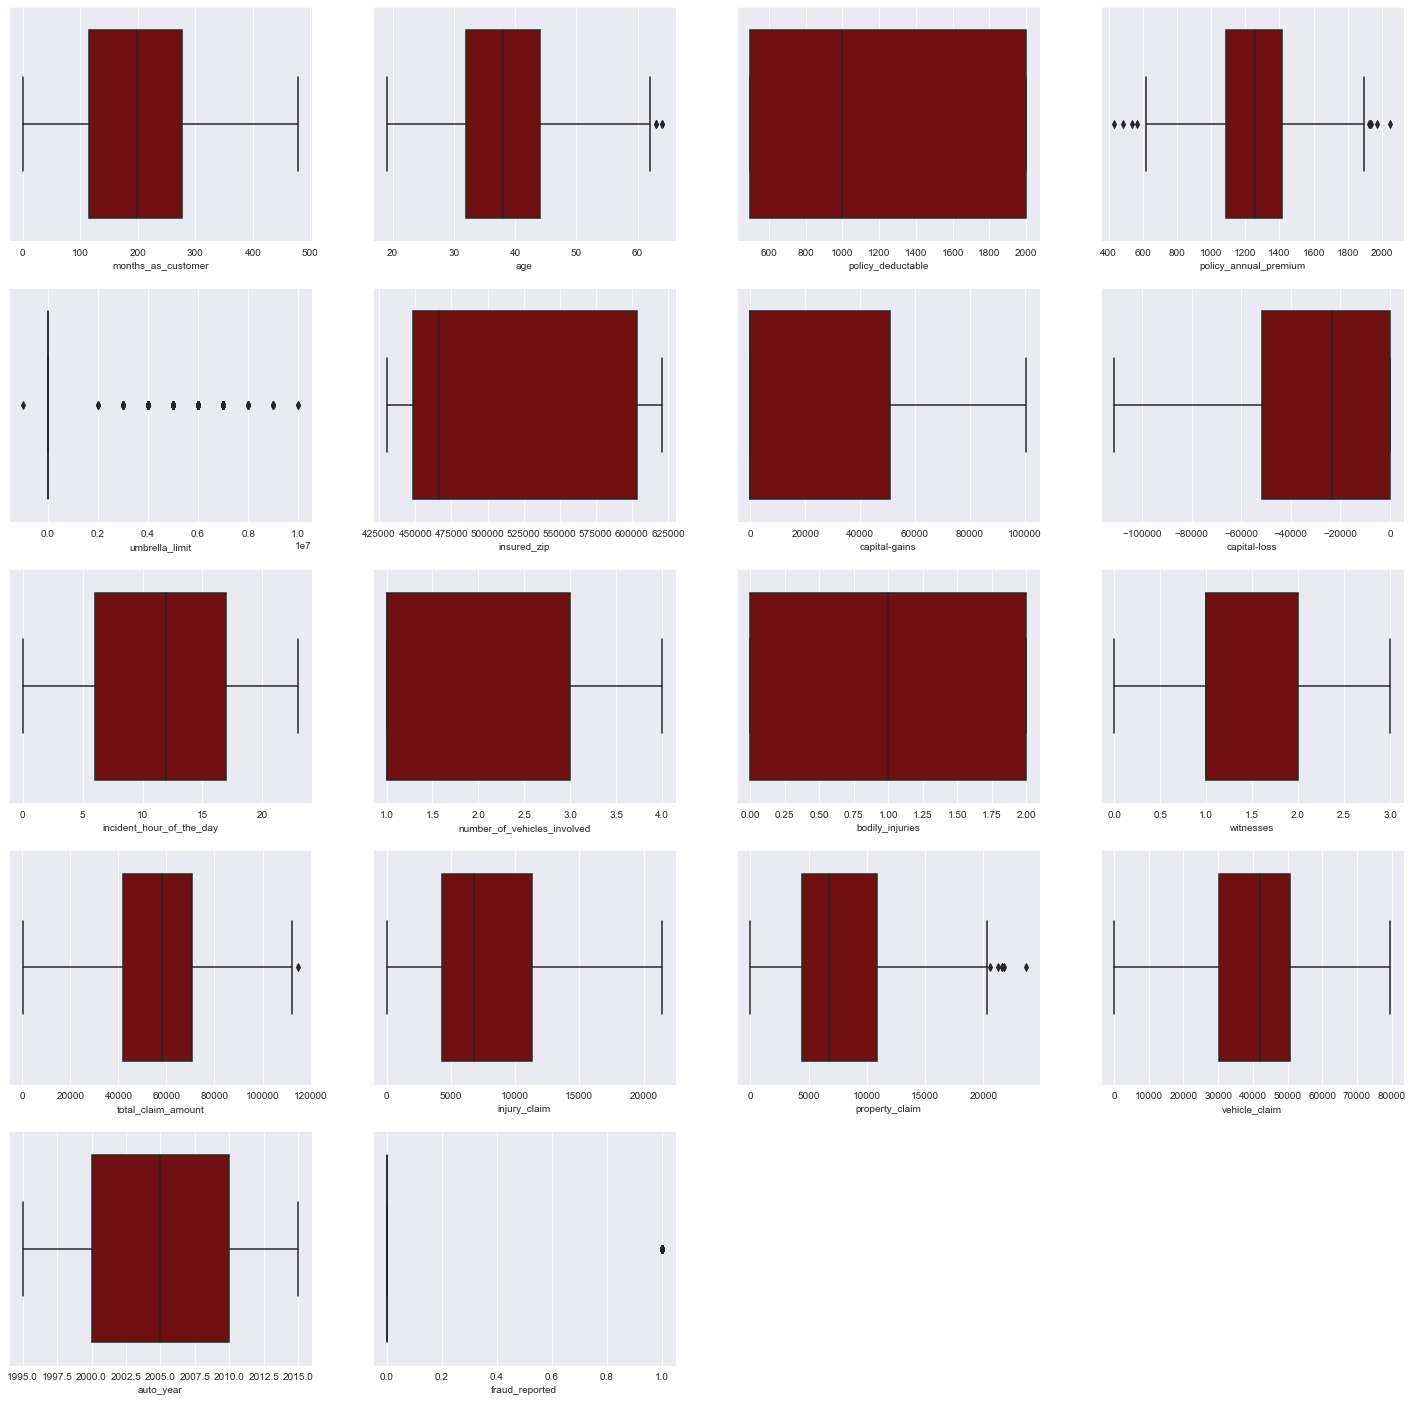

In [31]:
# analysing the spread of data using boxplots through which we can also visualise outliers
plt.figure(figsize=(25,25))
plot = 1

for var in numerical_features:
    plt.subplot(5,4,plot)
    sns.boxplot(x=df[var],color='maroon')
    plot+=1
plt.show()

- Can see some outliers in the dataset from the above plot
- Will be keeping the outliers in our dataset as the problem statement is for fraud detection, and outliers can represent frauds, therefore will keep the outliers and will scale down the abnormal values in feature engineering 

In [32]:
discrete_vars=['policy_deductable','umbrella_limit','number_of_vehicles_involved',
               'bodily_injuries','witnesses','auto_year']  
df[discrete_vars].head(10)

,policy_deductable,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,auto_year
0,1000,0,1,1,2,2004
1,2000,5000000,1,0,0,2007
2,2000,5000000,3,2,3,2007
3,2000,6000000,1,1,2,2014
4,1000,6000000,1,0,1,2009
5,1000,0,3,0,2,2003
6,1000,0,3,0,0,2012
7,1000,0,3,2,2,2015
8,500,0,1,1,1,2012
9,500,0,1,2,1,1996


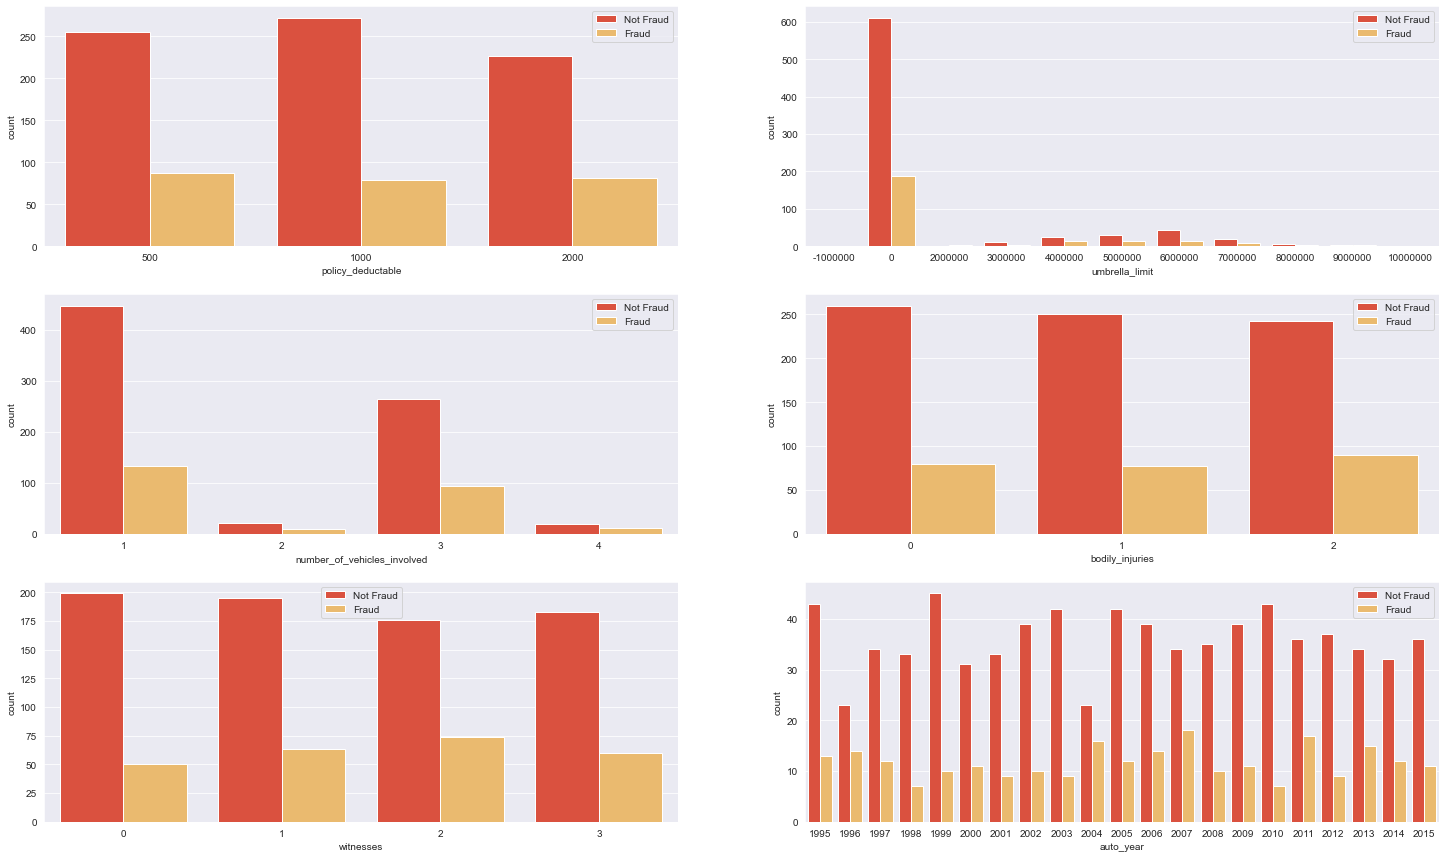

In [33]:
plot=1
plt.figure(figsize=(25,15))
for i in discrete_vars:
    plt.subplot(3,2,plot)
    sns.countplot(x=df[i],hue=df.fraud_reported,palette='YlOrRd_r')
    plt.legend(labels=['Not Fraud','Fraud'])
    plot+=1
plt.show()

- There is no specific relation between fraud reported and policy deductable
- Usually Frauds have an Umbrella limit of 0
- If the insured claims that number of vehicles involved are 1 or 3 there are quite good chances of he or she being a fraud

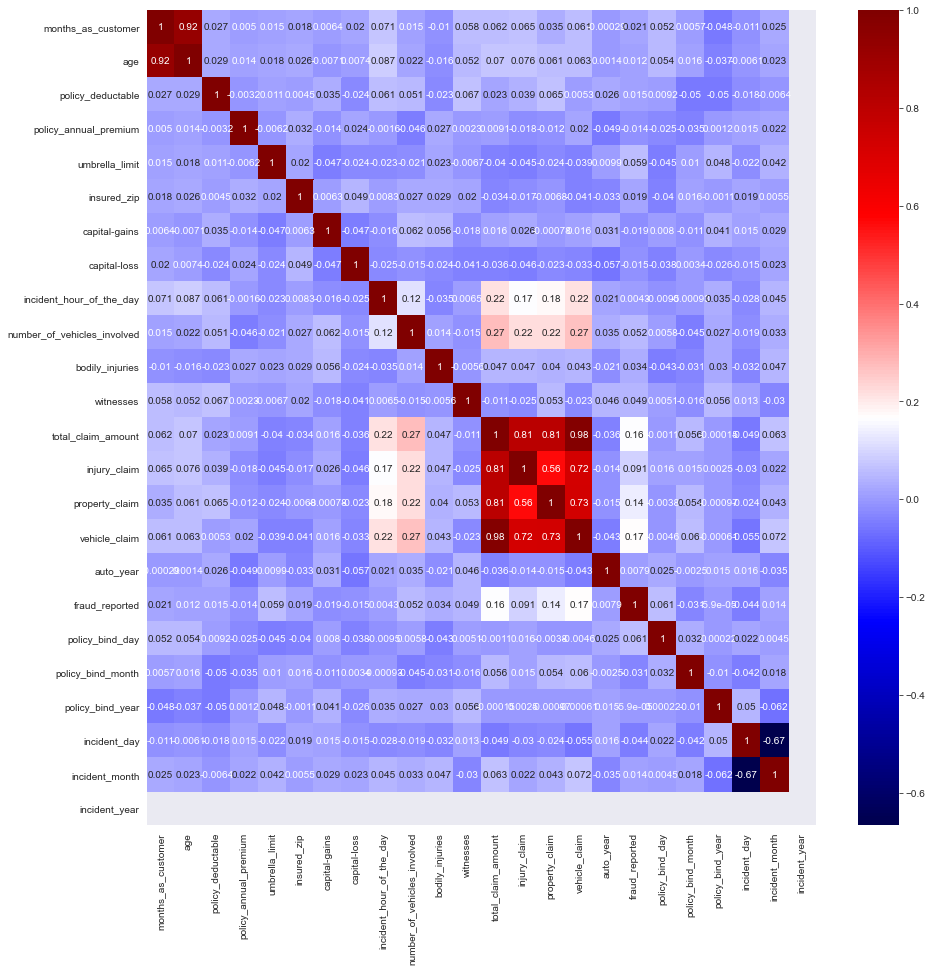

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

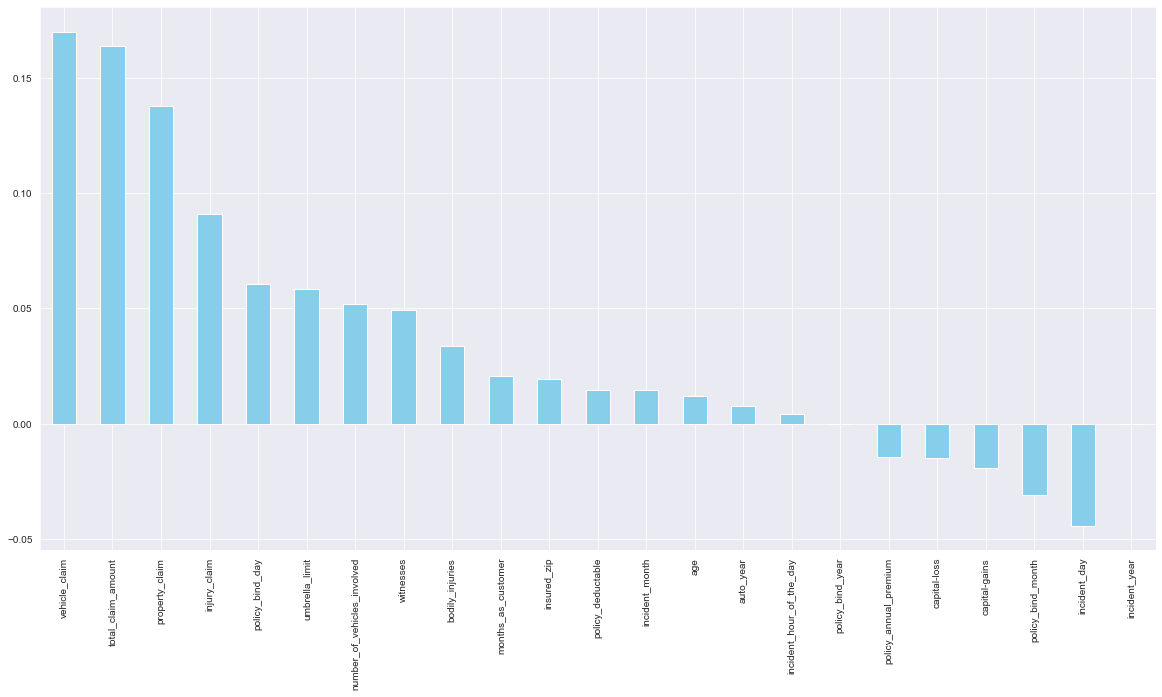

In [35]:
plt.figure(figsize=(20,10))
df.corr().fraud_reported.sort_values(ascending=False).drop('fraud_reported').plot.bar(color='skyblue')
plt.show()

- From above we can see the correlation between the variables
- Can see higher multicollinearity between independent variables
- Also policy_bind year and incident_year have no correlation with target variable

In [36]:
# analysing categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' ] 
print('Number of numerical variables: ', len(categorical_features))
print(categorical_features)

Number of numerical variables:  17
['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']


In [37]:
# visualising categorical features
df[categorical_features].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX


In [38]:
# checking number of categories
for var in categorical_features:
    print("{} has {} categories".format(var,len(df[var].unique())))

policy_state has 3 categories
policy_csl has 3 categories
insured_sex has 2 categories
insured_education_level has 7 categories
insured_occupation has 14 categories
insured_hobbies has 20 categories
insured_relationship has 6 categories
incident_type has 4 categories
collision_type has 4 categories
incident_severity has 4 categories
authorities_contacted has 5 categories
incident_state has 7 categories
incident_city has 7 categories
property_damage has 3 categories
police_report_available has 3 categories
auto_make has 14 categories
auto_model has 39 categories


In [39]:
# checking statistical summary od numerical variables
df[categorical_features].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,4,Rear Collision,292
incident_severity,1000,4,Minor Damage,354


- From above we can see the statistical summary of categorical variables
- The categories listed as top are the categories has highest freuency of occurence in the dataset

In [40]:
#checking unique values in type feature
for i in categorical_features:
    print("Unique values in {} are \n{}".format(i,df[i].value_counts()))
    print("-"*30)

Unique values in policy_state are 
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------
Unique values in policy_csl are 
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
------------------------------
Unique values in insured_sex are 
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------------------------
Unique values in insured_education_level are 
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------
Unique values in insured_occupation are 
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners   

In [41]:
# replacing the '?' category with nan values
df.collision_type = df.collision_type.replace('?', np.NaN)
df.property_damage = df.property_damage.replace('?', np.NaN)
df.police_report_available = df.police_report_available.replace('?', np.NaN)

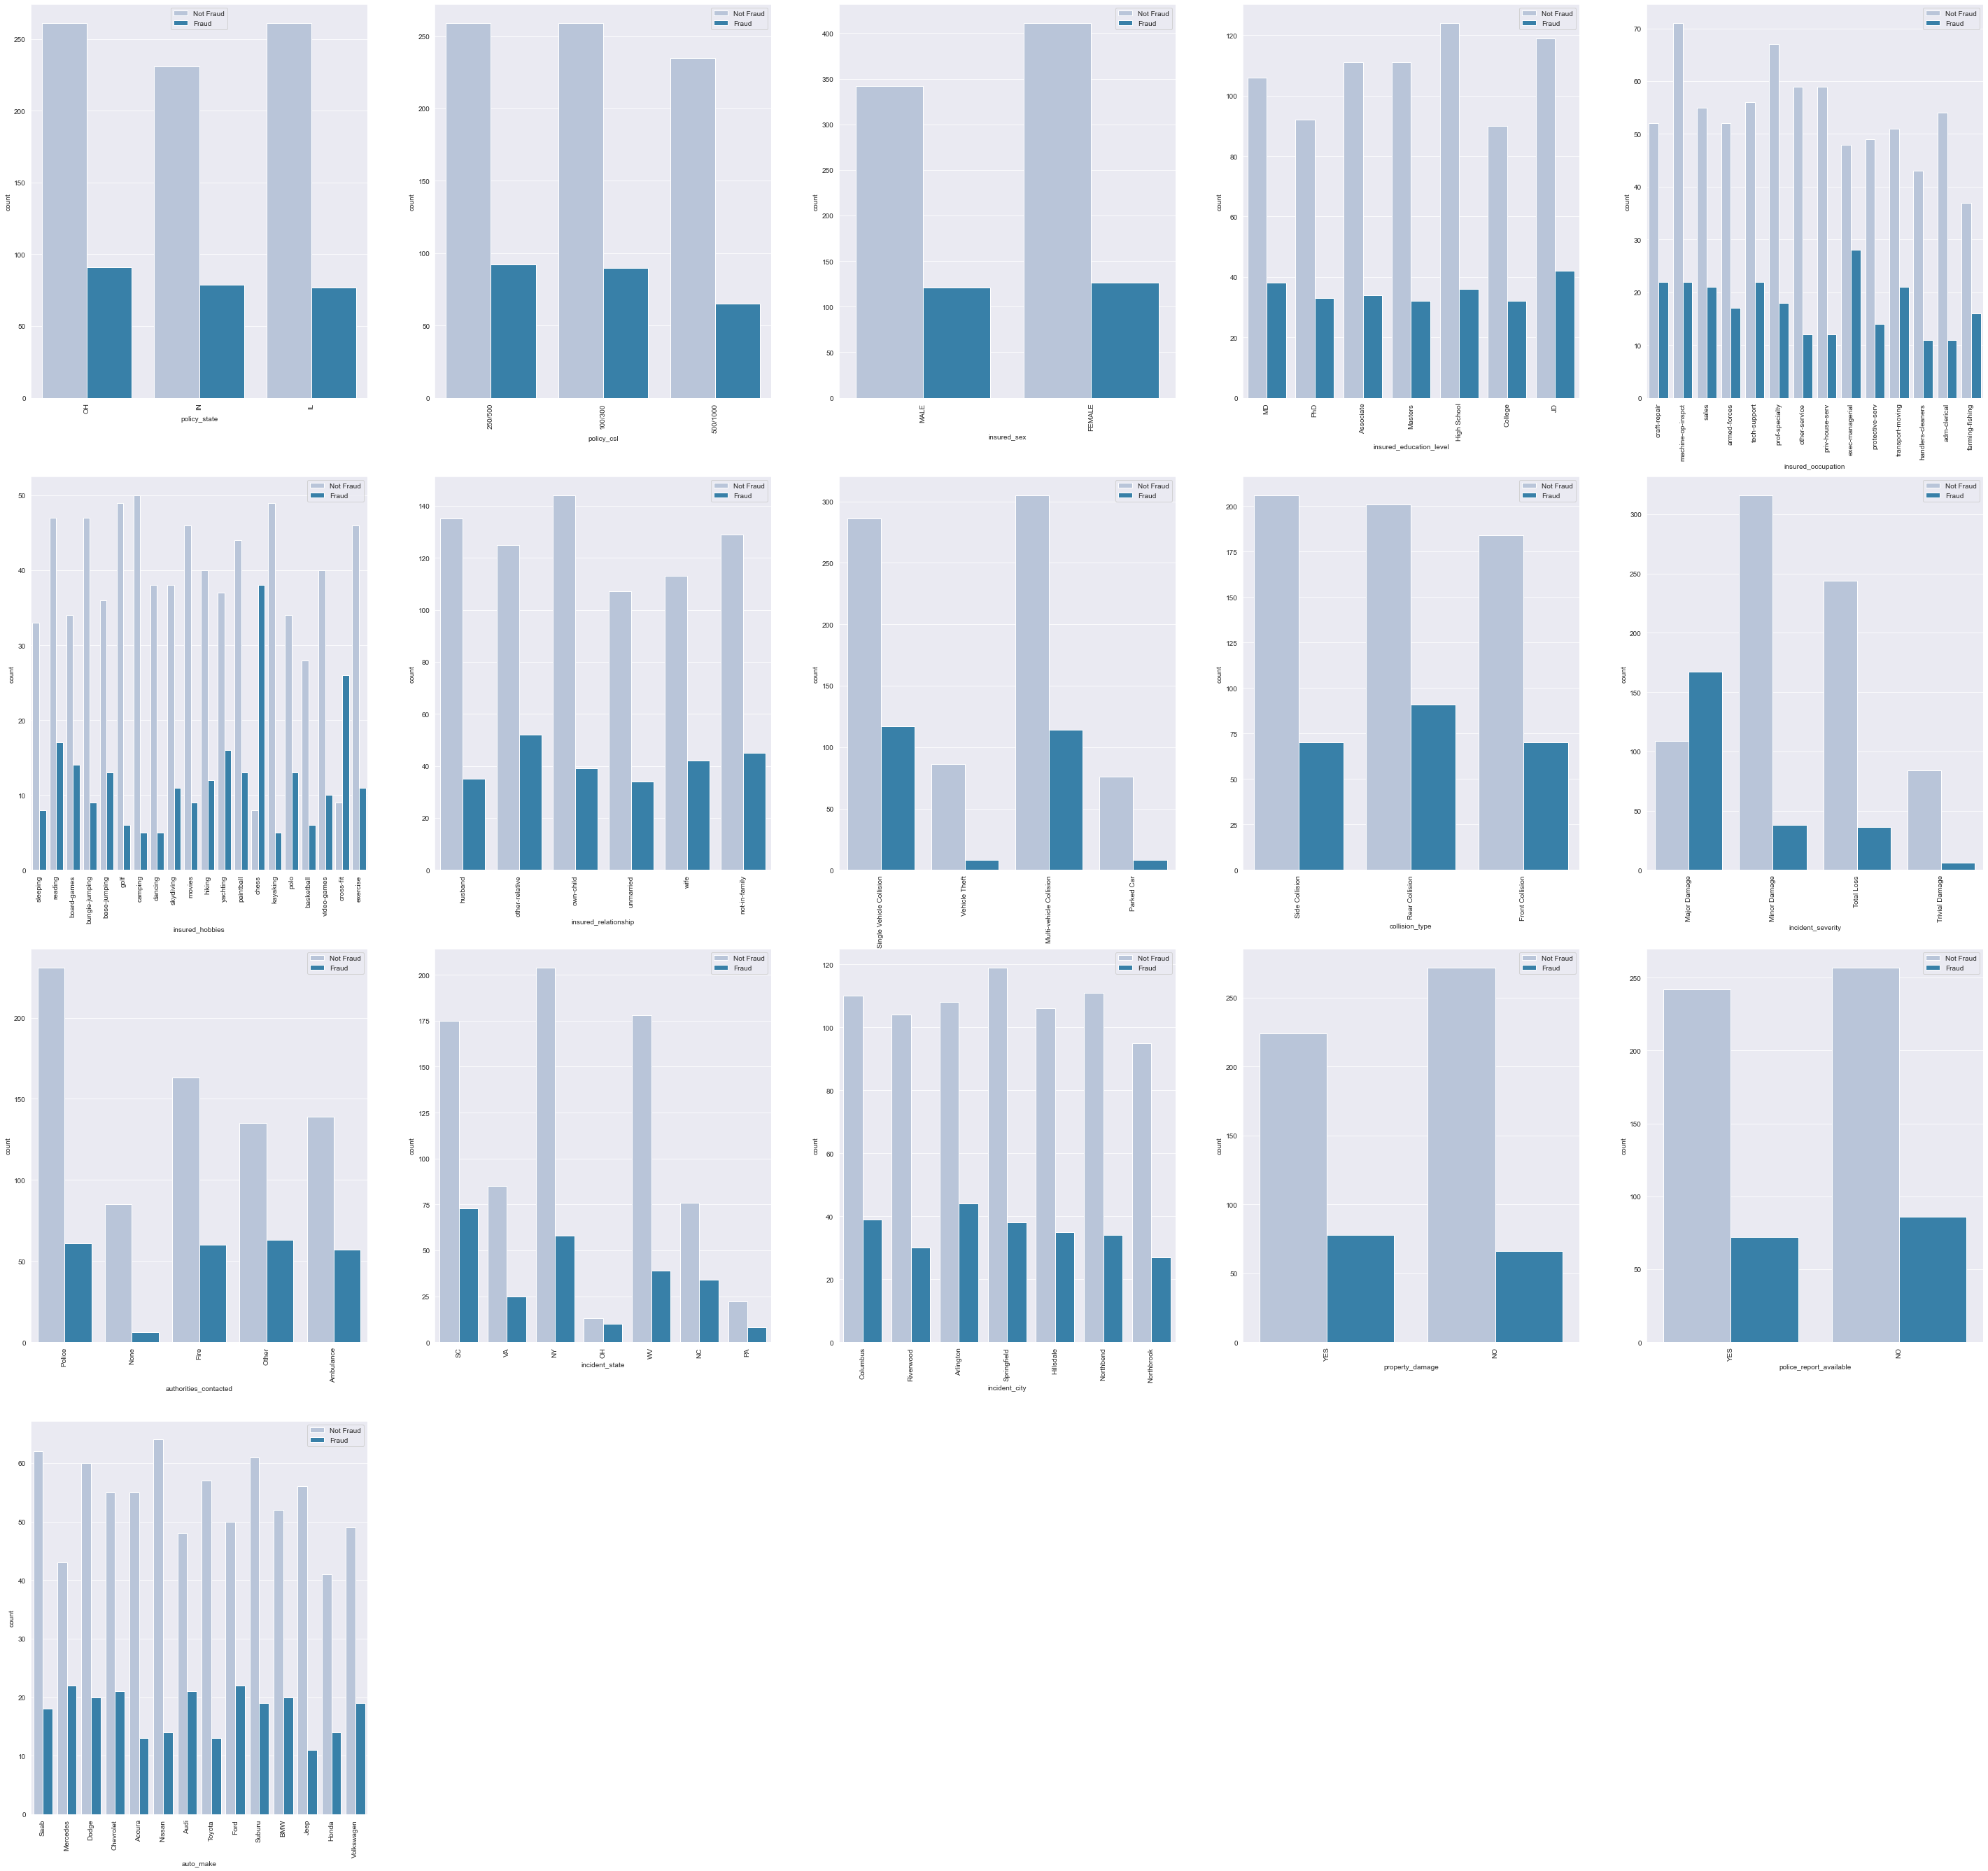

In [42]:
plot=1
plt.figure(figsize=(50,60))
for var in categorical_features[:-1]:
    plt.subplot(5,5,plot)
    sns.countplot(x=df[var],hue=df.fraud_reported,palette='PuBu')
    plt.legend(labels=['Not Fraud','Fraud'])
    plt.xticks(rotation=90)
    plot+=1
plt.show()

- Policy state, gender and policy csl does not have any specific relation with fraud reported cannot specifically say for these features 
- Majorly non-frauds are only high school qualified
- Majorly non-frauds have machine operation inspector and majorly frauds have managerial executive as occupation
- Mostly frauds have hobbies as playing chess or crossfit
- Mostlhy frauds claim to be other relative as relationship
- Non frauds generally claim to have multi vehicle collision
- Frauds generally claim that they had rear collision
- People who claim minor damage are more likely non-frauds but people claiming major damage can have chances of being a fraud
- Majorly Non-frauds tend to contact police
- Mostly frauds claim the incident state as South Carolina
- Mostly frauds claim the incident city as Arlington
- Mostly for frauds there is no property damage
- Majorly Frauds do not have any police report registered
- Frauds can claim his or her vehicle from any of the automobile makers

#### Missing Value Treatment

In [43]:
#checking missing values
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [44]:
#checking percentage of missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'% missing values')

collision_type 0.178 % missing values
property_damage 0.36 % missing values
police_report_available 0.343 % missing values


In [45]:
# checking missing values of collision type with refrence to incident_type
null = df.loc[df.collision_type.isnull()]
null.loc[:,'incident_type':'collision_type']

,incident_type,collision_type
1,Vehicle Theft,NaN
4,Vehicle Theft,NaN
13,Parked Car,NaN
26,Parked Car,NaN
27,Vehicle Theft,NaN
37,Parked Car,NaN
48,Vehicle Theft,NaN
51,Vehicle Theft,NaN
52,Vehicle Theft,NaN
54,Parked Car,NaN


As we can see that collision type is missing only for incident_type being either theft or parked car so will be categorizing these values as 'No Collision'

In [46]:
df.collision_type = df.collision_type.fillna("No Collision")

In [47]:
# imputing with mode of the respevtive variables
df.property_damage = df.property_damage.fillna(df.property_damage.mode()[0])
df.police_report_available = df.police_report_available.fillna(df.police_report_available.mode()[0])

In [48]:
#checking missing values
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

### Feature Engineering

In [49]:
df2=df.copy()

#### Handling Skewness

In [50]:
df2.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
incident_year                  0.000000
dtype: float64

In [51]:
# applying transformation on insured_zip, vehicle_claim and total_claim_amount since they are skewed more
df2.insured_zip = np.log(df2.insured_zip+1)
df2.vehicle_claim = np.power(df2.vehicle_claim,2)
df2.total_claim_amount = np.power(df2.total_claim_amount,2)

In [52]:
df2.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount             0.533008
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                  0.488948
auto_year                     -0.048289
fraud_reported                 1.175051
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
incident_year                  0.000000
dtype: float64

#### Encoding categorical variable

In [53]:
categorical_features

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [54]:
# mapping insured_sex with 0 and 1 
df2.insured_sex = df2.insured_sex.map({'FEMALE':0,'MALE':1})

In [55]:
# will be target encoding rest of the categorical variables
import category_encoders as ce
encoder=ce.TargetEncoder(cols=['policy_state', 'policy_csl','insured_education_level',
                               'insured_occupation','insured_hobbies','insured_relationship',
                               'incident_type','collision_type','incident_severity',
                               'authorities_contacted','incident_state', 'incident_city',
                               'property_damage','police_report_available','auto_make',
                               'auto_model']) 
encoded=encoder.fit_transform(df2[['policy_state', 'policy_csl','insured_education_level',
                               'insured_occupation','insured_hobbies','insured_relationship',
                               'incident_type','collision_type','incident_severity',
                               'authorities_contacted','incident_state', 'incident_city',
                               'property_damage','police_report_available','auto_make',
                               'auto_model']],df2['fraud_reported'])

In [56]:
df3=df2.drop(['policy_state', 'policy_csl','insured_education_level',
                               'insured_occupation','insured_hobbies','insured_relationship',
                               'incident_type','collision_type','incident_severity',
                               'authorities_contacted','incident_state', 'incident_city',
                               'property_damage','police_report_available','auto_make',
                               'auto_model'],axis=1)
df3 = pd.concat([df3, encoded], axis=1)
df3.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,policy_state,policy_csl,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,328,48,1000,1406.91,0,13.052226,1,53300,0,5,1,1,2,5127992100,6510,13020,2712326400,2004,1,17,10,2014,25,1,2015,0.258523,0.262108,0.263889,0.297297,0.195122,0.205882,0.290323,0.253623,0.605072,0.208904,0.294355,0.261745,0.258278,0.229299,0.225000,0.285714
1,228,42,2000,1197.22,5000000,13.056602,1,0,0,8,1,0,0,25704900,780,780,12320100,2007,1,27,6,2006,21,1,2015,0.254839,0.262108,0.263889,0.236559,0.265625,0.293785,0.085106,0.089888,0.107345,0.208904,0.227273,0.223881,0.242120,0.255102,0.338462,0.259259
2,134,29,2000,1413.14,5000000,12.973011,0,35100,0,7,3,2,3,1200622500,7700,3850,533610000,2007,0,9,6,2000,22,2,2015,0.258523,0.257880,0.264000,0.276316,0.291667,0.213115,0.272076,0.311644,0.107345,0.208904,0.221374,0.261745,0.242120,0.255102,0.250000,0.325581
3,256,41,2000,1415.74,6000000,13.318124,0,48900,-62400,5,1,1,2,4019560000,6340,6340,2572518400,2014,1,25,5,1990,1,10,2015,0.227811,0.262108,0.264000,0.246377,0.291667,0.241135,0.290323,0.275591,0.605072,0.208904,0.434783,0.289474,0.242120,0.255102,0.276316,0.375000
4,228,44,1000,1583.91,6000000,13.322373,1,66000,-46000,20,1,0,1,42250000,1300,650,20702500,2009,0,6,6,2014,17,2,2015,0.227811,0.216667,0.234483,0.276316,0.291667,0.241135,0.085106,0.089888,0.107345,0.065934,0.221374,0.289474,0.242120,0.255102,0.191176,0.083336


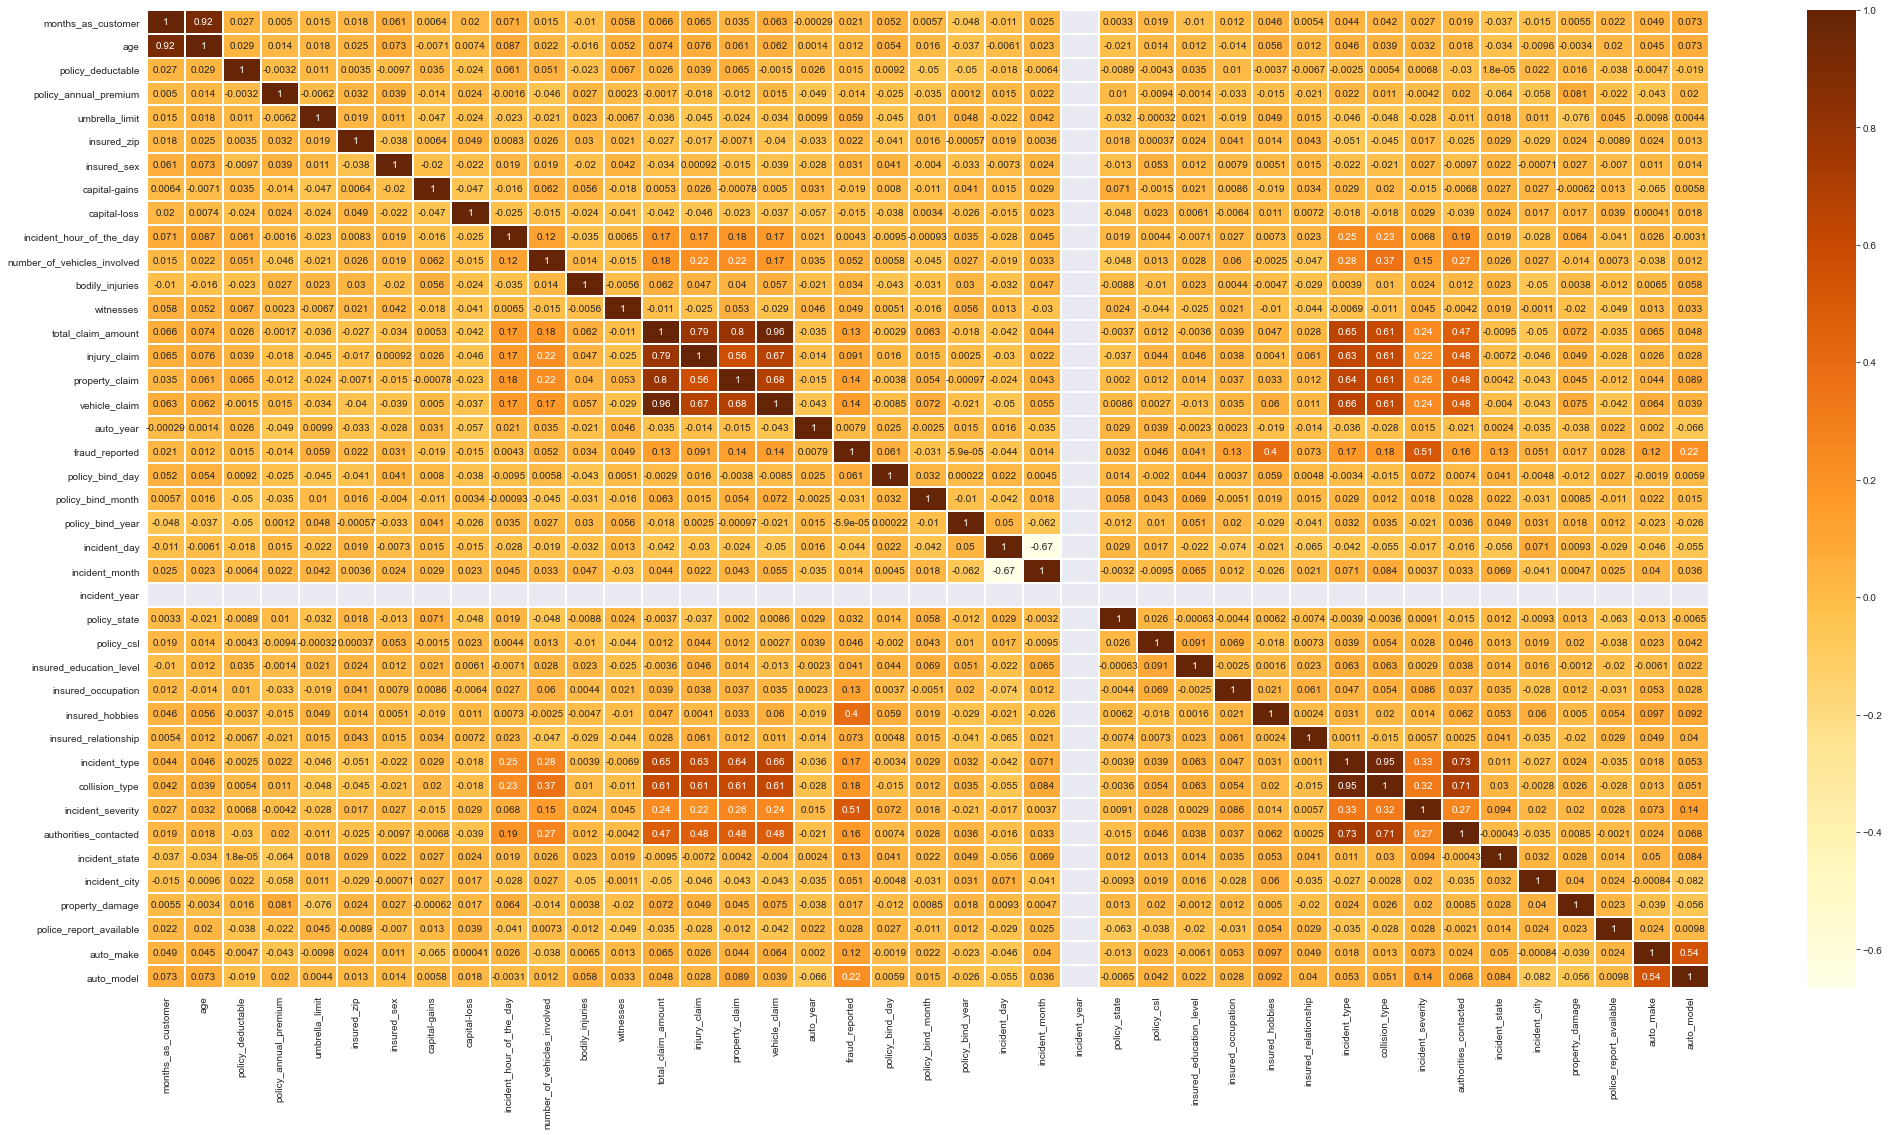

In [57]:
# checking correlation 
plt.figure(figsize=(35,18))
sns.heatmap(df3.corr(),annot=True,cmap='YlOrBr',linewidths=1)
plt.show()

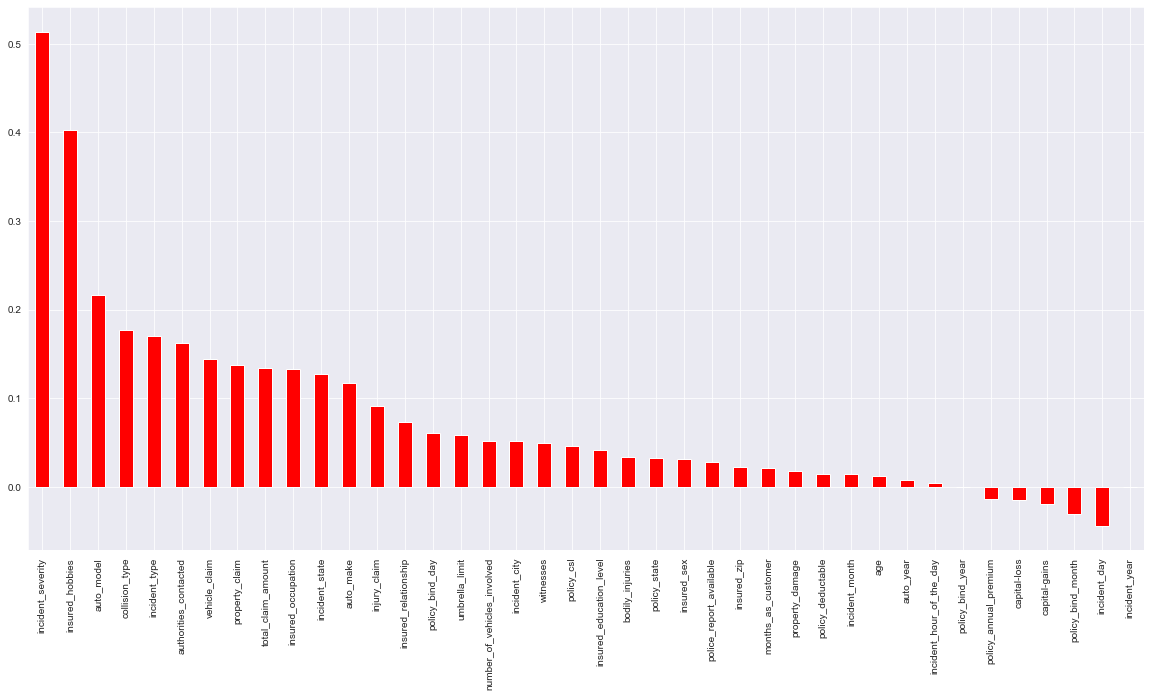

In [58]:
# checking correlation with respect to target variable
plt.figure(figsize=(20,10))
df3.corr().fraud_reported.sort_values(ascending=False).drop('fraud_reported').plot.bar(color='r')
plt.show()

From above plots we can see some of the independent variables are highly correlated. So will be removing the variables with weakest strength with target variable. Also incident_year is not correlated with any feature so will be removing it as well.

In [59]:
# resolving multicollinearity issue
df3.drop(['age','injury_claim','vehicle_claim','property_claim',
          'incident_type','incident_year'],axis=1,inplace=True)

In [60]:
df3.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_state,policy_csl,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,328,1000,1406.91,0,13.052226,1,53300,0,5,1,1,2,5127992100,2004,1,17,10,2014,25,1,0.258523,0.262108,0.263889,0.297297,0.195122,0.205882,0.253623,0.605072,0.208904,0.294355,0.261745,0.258278,0.229299,0.225000,0.285714
1,228,2000,1197.22,5000000,13.056602,1,0,0,8,1,0,0,25704900,2007,1,27,6,2006,21,1,0.254839,0.262108,0.263889,0.236559,0.265625,0.293785,0.089888,0.107345,0.208904,0.227273,0.223881,0.242120,0.255102,0.338462,0.259259
2,134,2000,1413.14,5000000,12.973011,0,35100,0,7,3,2,3,1200622500,2007,0,9,6,2000,22,2,0.258523,0.257880,0.264000,0.276316,0.291667,0.213115,0.311644,0.107345,0.208904,0.221374,0.261745,0.242120,0.255102,0.250000,0.325581
3,256,2000,1415.74,6000000,13.318124,0,48900,-62400,5,1,1,2,4019560000,2014,1,25,5,1990,1,10,0.227811,0.262108,0.264000,0.246377,0.291667,0.241135,0.275591,0.605072,0.208904,0.434783,0.289474,0.242120,0.255102,0.276316,0.375000
4,228,1000,1583.91,6000000,13.322373,1,66000,-46000,20,1,0,1,42250000,2009,0,6,6,2014,17,2,0.227811,0.216667,0.234483,0.276316,0.291667,0.241135,0.089888,0.107345,0.065934,0.221374,0.289474,0.242120,0.255102,0.191176,0.083336


#### Imbalanced Dataset

In [61]:
## splitting into dependent and independent variables
X = df3.drop(['fraud_reported'],axis=1)
Y = df3.fraud_reported

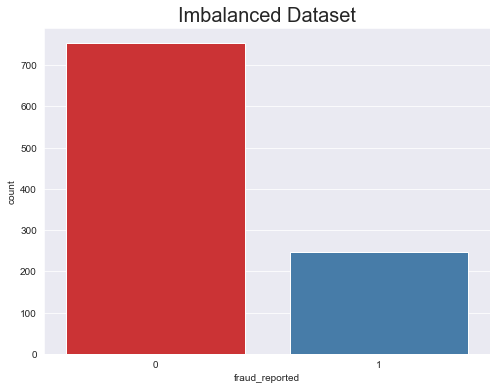

0    753
1    247
Name: fraud_reported, dtype: int64


In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x=Y,palette='Set1')
plt.title("Imbalanced Dataset",fontsize=20)
plt.show()
print(Y.value_counts())

In [63]:
# will be handling the imbalnce using SMOTE over sampling technique 
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
x,y = sm.fit_resample(X,Y)
print(x.shape," \t ",y.shape)

(1506, 34)  	  (1506,)


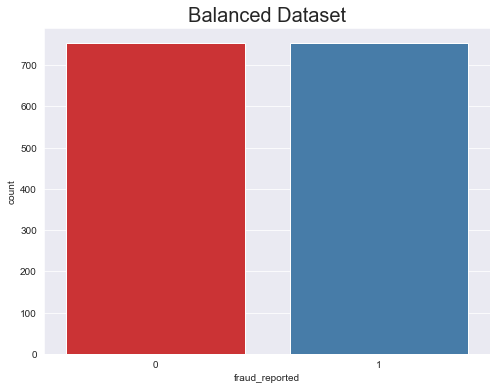

1    753
0    753
Name: fraud_reported, dtype: int64


In [64]:
plt.figure(figsize=(8,6))
sns.countplot(x=y,palette='Set1')
plt.title("Balanced Dataset",fontsize=20)
plt.show()
print(y.value_counts())

#### Scaling

In [65]:
# Will be scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_state,policy_csl,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,0.684760,0.333333,0.603112,0.090909,0.219043,1.0,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.388289,0.45,0.533333,0.818182,0.96,0.800000,0.000000,1.000000,1.000000,0.997238,0.643324,0.141752,0.000000,0.738358,1.000000,0.566784,0.449430,0.593195,1.0,0.000000,0.348979,0.602597
1,0.475992,1.000000,0.473214,0.545455,0.230957,1.0,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.001946,0.60,0.866667,0.454545,0.64,0.666667,0.000000,0.880047,1.000000,0.997238,0.338730,0.237651,1.000000,0.000000,0.075553,0.566784,0.186424,0.037691,0.0,1.000000,1.000000,0.533333
2,0.279749,1.000000,0.606972,0.545455,0.003341,0.0,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.090910,0.60,0.266667,0.454545,0.40,0.700000,0.090909,1.000000,0.906944,1.000000,0.538104,0.273073,0.082277,1.000000,0.075553,0.566784,0.163298,0.593195,0.0,1.000000,0.492424,0.706977
3,0.534447,1.000000,0.608582,0.636364,0.943082,0.0,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.304359,0.95,0.800000,0.363636,0.00,0.000000,0.818182,0.000000,1.000000,1.000000,0.387964,0.273073,0.401038,0.837419,1.000000,0.566784,1.000000,1.000000,0.0,1.000000,0.643419,0.836364
4,0.475992,0.333333,0.712760,0.636364,0.954651,1.0,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.003198,0.70,0.166667,0.454545,0.96,0.533333,0.090909,0.000000,0.000000,0.266174,0.538104,0.273073,0.401038,0.000000,0.075553,0.000000,0.163298,1.000000,0.0,1.000000,0.154906,0.072734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.290188,0.508667,0.516002,0.090909,0.409626,1.0,0.120896,0.888749,0.130435,0.333333,1.0,0.333333,0.191638,0.35,0.233333,0.363636,0.12,0.200000,0.454545,0.231944,0.975474,0.775379,0.825717,0.338113,0.441836,0.957151,1.000000,0.971407,0.180329,0.380278,1.0,1.000000,0.595645,0.340922
1502,0.607516,0.908667,0.729956,0.578629,0.199506,1.0,0.564249,0.972664,0.652174,0.666667,0.0,0.000000,0.264964,0.55,0.766667,0.181818,0.64,0.633333,0.000000,0.908769,0.908769,0.911545,0.545127,0.989672,0.636457,0.985168,0.111381,0.823023,0.215689,0.037691,0.0,1.000000,0.737186,0.506702
1503,0.626305,0.181333,0.513043,0.090909,0.131103,0.0,0.187920,0.712448,0.521739,0.333333,0.0,0.666667,0.218263,0.65,0.266667,0.454545,0.12,0.366667,0.000000,0.455091,1.000000,0.976904,0.615087,0.589929,0.663884,0.738358,0.496260,0.852259,0.640836,0.017153,0.0,1.000000,0.308299,0.666567
1504,0.373695,0.548000,0.614912,0.090909,0.244503,1.0,0.121940,0.427930,0.086957,0.000000,0.5,0.333333,0.475506,0.30,0.300000,0.545455,0.36,0.000000,0.090909,0.000000,0.292493,0.020612,0.427856,0.226328,0.298236,0.915620,1.000000,0.833075,0.289877,0.279681,0.0,0.677496,0.449666,0.591632


In [66]:
# performing train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1)

### Feature Selection

In [67]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.01395352, 0.20473013, 0.0042622 , 0.13243998, 0.08278401,
       0.        , 0.06723813, 0.04210629, 0.01264525, 0.03453831,
       0.        , 0.03641106, 0.13620479, 0.02037657, 0.01323623,
       0.        , 0.01833717, 0.08937728, 0.        , 0.18042503,
       0.18875684, 0.23282941, 0.24093982, 0.2964558 , 0.25090295,
       0.19304098, 0.3027412 , 0.21468395, 0.23515146, 0.22792707,
       0.08162678, 0.09173798, 0.25179514, 0.22526868])

In [68]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

incident_severity              0.302741
insured_hobbies                0.296456
auto_make                      0.251795
insured_relationship           0.250903
insured_occupation             0.240940
incident_state                 0.235151
insured_education_level        0.232829
incident_city                  0.227927
auto_model                     0.225269
authorities_contacted          0.214684
policy_deductable              0.204730
collision_type                 0.193041
policy_csl                     0.188757
policy_state                   0.180425
total_claim_amount             0.136205
umbrella_limit                 0.132440
police_report_available        0.091738
incident_day                   0.089377
insured_zip                    0.082784
property_damage                0.081627
capital-gains                  0.067238
capital-loss                   0.042106
witnesses                      0.036411
number_of_vehicles_involved    0.034538
auto_year                      0.020377


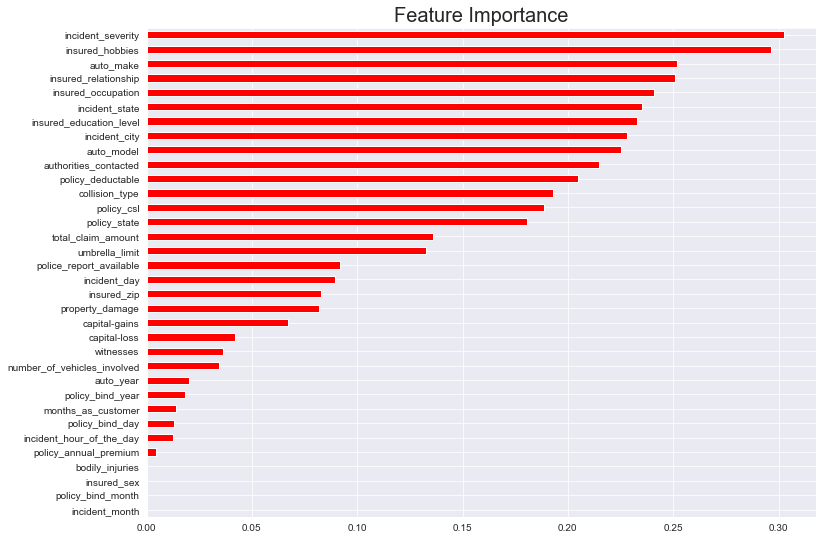

In [69]:
plt.title("Feature Importance",fontsize=20)
mutual_info.sort_values().plot(kind='barh',figsize=(12,9),color='r')
plt.show()

In [70]:
from sklearn.feature_selection import SelectPercentile

#selecting top 60 percentile
selected_cols = SelectPercentile(mutual_info_classif,60)
selected_cols.fit(xtrain,ytrain)

SelectPercentile(percentile=60,
                 score_func=<function mutual_info_classif at 0x116e14040>)

In [71]:
selected_cols.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [72]:
xtrain.columns[selected_cols.get_support()]

Index(['policy_deductable', 'umbrella_limit', 'insured_zip',
       'total_claim_amount', 'incident_day', 'policy_state', 'policy_csl',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [73]:
x_train = selected_cols.transform(xtrain)
x_test = selected_cols.transform(xtest)

### Model Buliding 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score

In [75]:
# creating instances for models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DTC = DecisionTreeClassifier()
NB = GaussianNB()
RTF = RandomForestClassifier()
ADB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [76]:
# creating list of model names and instances
models = [("Logistic Regression ",LR),
          ("K Nearest Neighbor classifier ",KNN),
          ("Support Vector classifier ",SV),
          ("Decision Tree classifier ",DTC),
          ("Random forest classifier ",RTF),
          ("AdaBoost classifier",ADB),
          ("Gradient Boosting classifier ",GB),
          ("Naive Bayes classifier",NB)]

##### Training the models 

In [77]:
for name,model in models:
    model.fit(x_train,ytrain)
    print(name," trained")

Logistic Regression   trained
K Nearest Neighbor classifier   trained
Support Vector classifier   trained
Decision Tree classifier   trained
Random forest classifier   trained
AdaBoost classifier  trained
Gradient Boosting classifier   trained
Naive Bayes classifier  trained


##### Evaluating the models

In [78]:
train_scores=[]
test_scores=[]
Model = []
for name,model in models:
    print("******",name,"******")
    train_acc = accuracy_score(ytrain,model.predict(x_train))
    test_acc = accuracy_score(ytest,model.predict(x_test))
    print('Train score : ',train_acc)
    print('Test score : ',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    Model.append(name)

****** Logistic Regression  ******
Train score :  0.50853889943074
Test score :  0.48008849557522126
****** K Nearest Neighbor classifier  ******
Train score :  0.7713472485768501
Test score :  0.6261061946902655
****** Support Vector classifier  ******
Train score :  0.5901328273244781
Test score :  0.5730088495575221
****** Decision Tree classifier  ******
Train score :  1.0
Test score :  0.8407079646017699
****** Random forest classifier  ******
Train score :  1.0
Test score :  0.8915929203539823
****** AdaBoost classifier ******
Train score :  0.9250474383301708
Test score :  0.8738938053097345
****** Gradient Boosting classifier  ******
Train score :  0.969639468690702
Test score :  0.8827433628318584
****** Naive Bayes classifier ******
Train score :  0.579696394686907
Test score :  0.5707964601769911


****** Logistic Regression  ******

 ROC_AUC_SCORE :  0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       235
           1       0.48      1.00      0.65       217

    accuracy                           0.48       452
   macro avg       0.24      0.50      0.32       452
weighted avg       0.23      0.48      0.31       452

Precision:  0.48008849557522126
Recall:  1.0
F1 score:  0.648729446935725


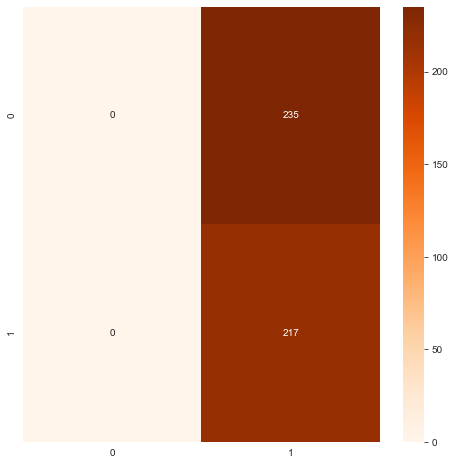

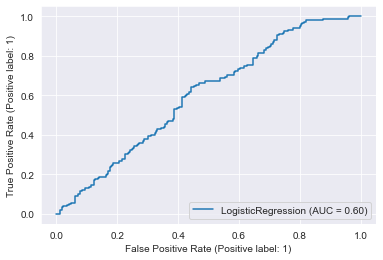

****** K Nearest Neighbor classifier  ******

 ROC_AUC_SCORE :  0.6287773311108932
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       235
           1       0.59      0.70      0.64       217

    accuracy                           0.63       452
   macro avg       0.63      0.63      0.63       452
weighted avg       0.63      0.63      0.62       452

Precision:  0.594488188976378
Recall:  0.695852534562212
F1 score:  0.6411889596602972


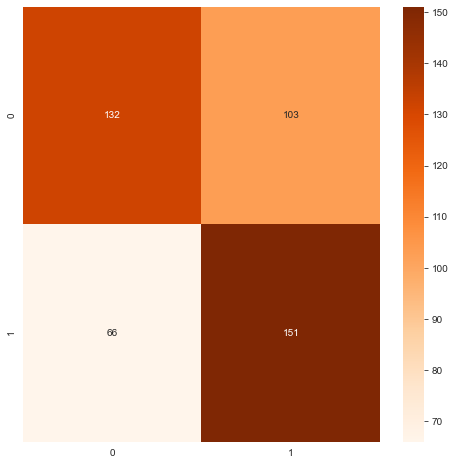

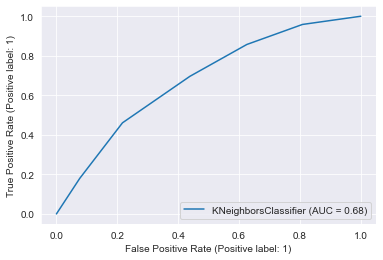

****** Support Vector classifier  ******

 ROC_AUC_SCORE :  0.5854789685263261
              precision    recall  f1-score   support

           0       0.74      0.27      0.40       235
           1       0.53      0.90      0.67       217

    accuracy                           0.57       452
   macro avg       0.64      0.59      0.53       452
weighted avg       0.64      0.57      0.53       452

Precision:  0.5327868852459017
Recall:  0.8986175115207373
F1 score:  0.6689536878216124


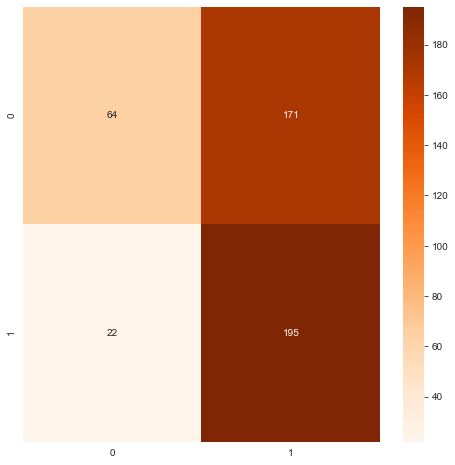

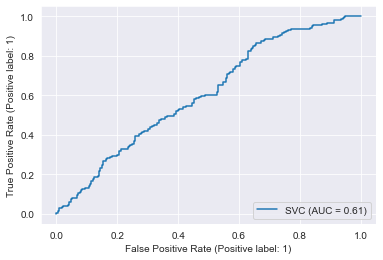

****** Decision Tree classifier  ******

 ROC_AUC_SCORE :  0.8409844102362976
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       235
           1       0.83      0.85      0.84       217

    accuracy                           0.84       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.84      0.84      0.84       452

Precision:  0.8251121076233184
Recall:  0.847926267281106
F1 score:  0.8363636363636364


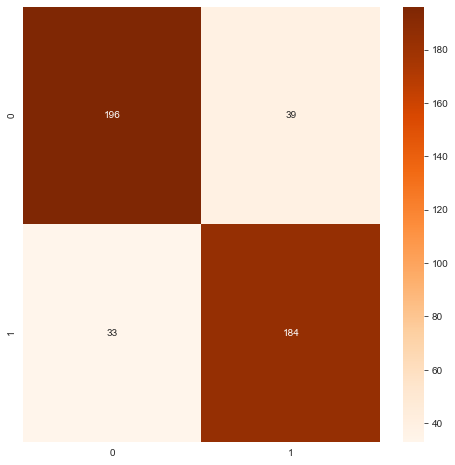

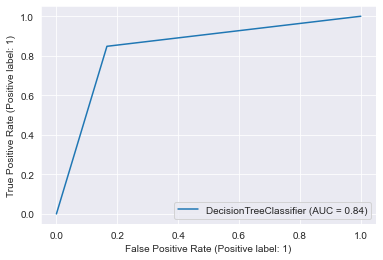

****** Random forest classifier  ******

 ROC_AUC_SCORE :  0.8918619472497303
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       235
           1       0.88      0.90      0.89       217

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452

Precision:  0.8783783783783784
Recall:  0.8986175115207373
F1 score:  0.8883826879271071


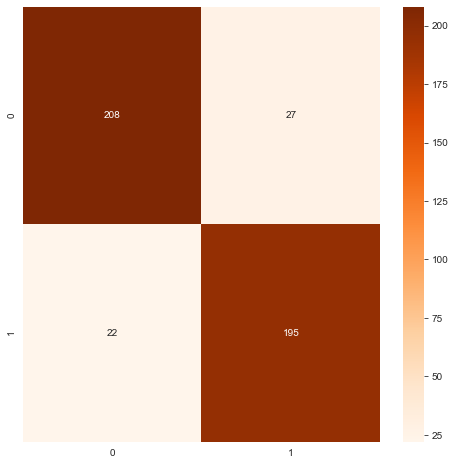

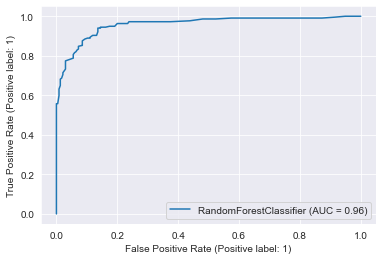

****** AdaBoost classifier ******

 ROC_AUC_SCORE :  0.8736052554171978
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       235
           1       0.87      0.87      0.87       217

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

Precision:  0.8703703703703703
Recall:  0.8663594470046083
F1 score:  0.8683602771362586


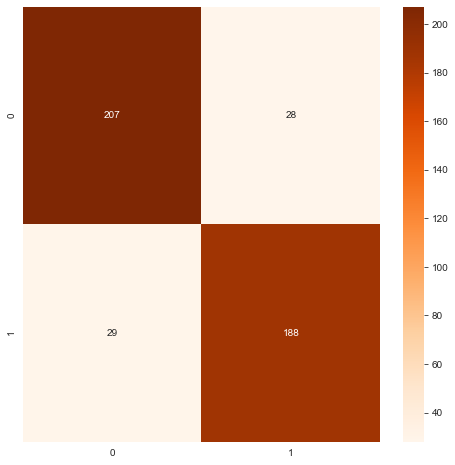

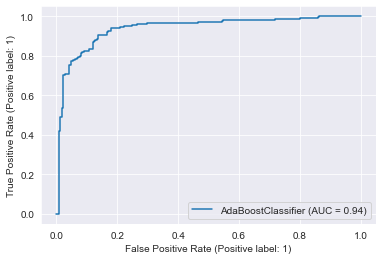

****** Gradient Boosting classifier  ******

 ROC_AUC_SCORE :  0.8831748210608883
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       235
           1       0.87      0.89      0.88       217

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452

Precision:  0.8660714285714286
Recall:  0.8940092165898618
F1 score:  0.8798185941043083


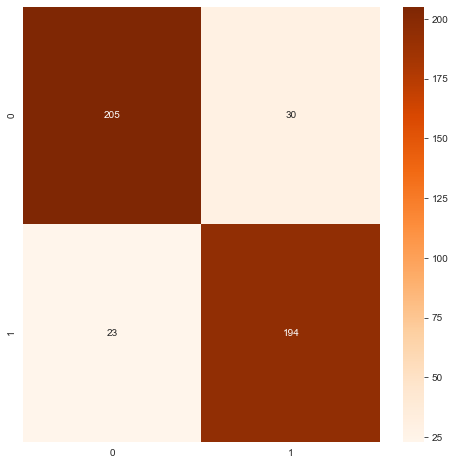

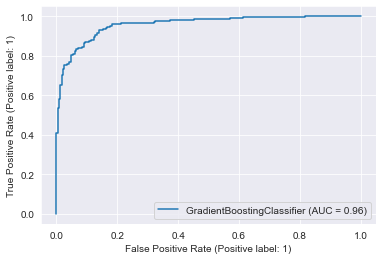

****** Naive Bayes classifier ******

 ROC_AUC_SCORE :  0.5732914991665851
              precision    recall  f1-score   support

           0       0.60      0.51      0.55       235
           1       0.55      0.64      0.59       217

    accuracy                           0.57       452
   macro avg       0.57      0.57      0.57       452
weighted avg       0.58      0.57      0.57       452

Precision:  0.5454545454545454
Recall:  0.6359447004608295
F1 score:  0.5872340425531913


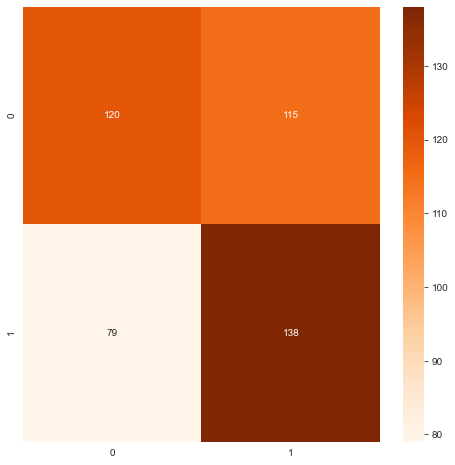

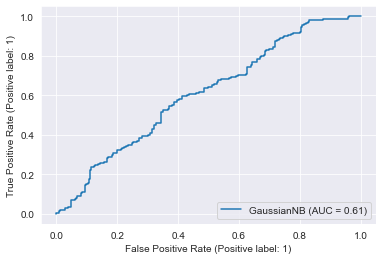

In [79]:
# checking different metrics for evaluation
precision_ =[]
recall_ = []
f1score = []
rocauc = []
for name,model in models:
    print("******",name,"******")
    
    fpr,tpr,thresholds=roc_curve(ytest,model.predict(x_test))
    roc_auc= auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    rocauc.append(roc_auc)
    print(classification_report(ytest,model.predict(x_test)))
    precision = precision_score(ytest, model.predict(x_test))
    print('Precision: ', precision)
    precision_.append(precision)
    recall = recall_score(ytest, model.predict(x_test))
    print('Recall: ', recall)
    recall_.append(recall)
    f1 = f1_score(ytest, model.predict(x_test))
    print('F1 score: ', f1)
    f1score.append(f1)
    plt.figure(figsize=(8,8))
    cm = confusion_matrix(ytest,model.predict(x_test))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges')
    plot_roc_curve(model,x_test,ytest)
    plt.show()

In [80]:
# checking cross validation score
crossval=[]
for name,model in models:
    print("******",name,"******")
    cv_= cross_val_score(model,x,y,cv=5).mean()
    print(cv_)
    crossval.append(cv_)

****** Logistic Regression  ******
0.5
****** K Nearest Neighbor classifier  ******
0.6407691799960397
****** Support Vector classifier  ******
0.5836571252557701
****** Decision Tree classifier  ******
0.8353875602296978
****** Random forest classifier  ******
0.9017865393500694
****** AdaBoost classifier ******
0.8652966931420651
****** Gradient Boosting classifier  ******
0.8898418076609975
****** Naive Bayes classifier ******
0.5796616136058612


In [81]:
# creating a data frame for evaluation
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train score'] = train_scores
evaluate['Test score'] = test_scores
evaluate['Precision'] = precision_
evaluate['Recall'] = recall_
evaluate['F1 score'] = f1score
evaluate['Roc-Auc score'] = rocauc
evaluate['Cross val score'] = crossval

evaluate

,Model,Train score,Test score,Precision,Recall,F1 score,Roc-Auc score,Cross val score
0,Logistic Regression,0.508539,0.480088,0.480088,1.000000,0.648729,0.500000,0.500000
1,K Nearest Neighbor classifier,0.771347,0.626106,0.594488,0.695853,0.641189,0.628777,0.640769
2,Support Vector classifier,0.590133,0.573009,0.532787,0.898618,0.668954,0.585479,0.583657
3,Decision Tree classifier,1.000000,0.840708,0.825112,0.847926,0.836364,0.840984,0.835388
4,Random forest classifier,1.000000,0.891593,0.878378,0.898618,0.888383,0.891862,0.901787
5,AdaBoost classifier,0.925047,0.873894,0.870370,0.866359,0.868360,0.873605,0.865297
6,Gradient Boosting classifier,0.969639,0.882743,0.866071,0.894009,0.879819,0.883175,0.889842
7,Naive Bayes classifier,0.579696,0.570796,0.545455,0.635945,0.587234,0.573291,0.579662


From the above visualisation will be choosing Adaboost classifier as the final model as it is performing the best as per the scores above. Will be selecting it to tune it further.

### Hyperparameter Tuning

In [82]:
params = {
          'n_estimators': [10, 50, 100, 500],
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
          'algorithm' :['SAMME','SAMME.R']
         }
random_search=RandomizedSearchCV(ADB,param_distributions=params,n_jobs=-1,cv=5,verbose=5)
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': [10, 50, 100, 500]},
                   verbose=5)

In [83]:
# best parameters after grid search
random_search.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=500)

0.8805309734513275
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       235
           1       0.84      0.92      0.88       217

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



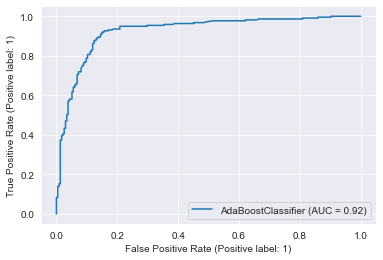

In [85]:
# tuning the model
tuned_model = AdaBoostClassifier(learning_rate=0.01, n_estimators=500)
tuned_model.fit(x_train,ytrain)
tuned_pred = tuned_model.predict(x_test)
print(accuracy_score(ytest,tuned_pred))
print(classification_report(ytest,tuned_model.predict(x_test)))
plot_roc_curve(tuned_model,x_test,ytest)

In [86]:
# checking cross val score
cross_val_score(tuned_model,x,y,cv=5).mean()

0.8871531979494401

### Saving the model

In [87]:
import joblib
joblib.dump(tuned_model,'Insurance_claim_fraud_detection.pkl')

['Insurance_claim_fraud_detection.pkl']